In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as cx

In [7]:
transit_df = pd.read_csv('./data/transit_dfs/TRX01_df.csv', low_memory=False, header=1)
transit_df.head()

transit_overall_df = transit_df.groupby(['Latitude_ddeg', 'Longitude_ddeg'])
transit_overall_df.head()

,Timestamp_UTC,Latitude_ddeg,Longitude_ddeg,Elevation_m,Battery_Voltage_volts,Train_Box_Temperature_degC,Train_Top_Relative_Humidity_%,Train_Top_Temperature_degC,ES642_PM2.5_Concentration_ug/m3,ES642_Air_Flow_Rate_L/min,...,Year,Month,Day_of_Year,Day_of_Month,Minute,Hour,Transit_ID,AQI,PM2.5_Category,Meso_West_Category
0,2018-11-19 20:13:02,40.722687,-111.919289,1218.9,13.68,21.37,-9999.00,-9999.00,5.0,2.0,...,2018,11,323,19,13,20,TRX01,Good,< 12.00,4.00 - 6.00
1,2018-11-19 20:14:10,40.722786,-111.918907,1219.4,13.68,21.37,-9999.00,-9999.00,5.0,2.0,...,2018,11,323,19,14,20,TRX01,Good,< 12.00,4.00 - 6.00
2,2018-11-19 20:15:10,40.722919,-111.918556,1220.1,13.68,21.40,-9999.00,-9999.00,6.0,2.0,...,2018,11,323,19,15,20,TRX01,Good,< 12.00,6.00 - 8.00
3,2018-11-19 20:16:22,40.722958,-111.918671,1221.8,13.65,21.40,-9999.00,-9999.00,5.0,2.0,...,2018,11,323,19,16,20,TRX01,Good,< 12.00,4.00 - 6.00
4,2018-11-19 20:17:22,40.723015,-111.918709,1222.3,13.65,21.42,-9999.00,-9999.00,6.0,2.0,...,2018,11,323,19,17,20,TRX01,Good,< 12.00,6.00 - 8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426722,2023-09-30 23:55:02,40.545792,-112.015762,1475.4,13.32,28.82,21.89,21.65,6.0,2.0,...,2023,9,273,30,55,23,TRX01,Good,< 12.00,6.00 - 8.00
1426723,2023-09-30 23:56:02,40.551926,-112.021736,1491.4,13.36,28.79,21.89,21.58,5.0,2.0,...,2023,9,273,30,56,23,TRX01,Good,< 12.00,4.00 - 6.00
1426724,2023-09-30 23:57:02,40.558887,-112.024696,1515.4,13.36,28.72,21.72,21.75,23.0,2.0,...,2023,9,273,30,57,23,TRX01,Moderate,12.00 - 35.50,20.00 - 28.00
1426725,2023-09-30 23:58:02,40.563351,-112.024689,1505.8,13.36,28.69,21.69,21.92,10.0,2.0,...,2023,9,273,30,58,23,TRX01,Good,< 12.00,10.00 - 12.00


In [8]:
transit_summer_df = transit_df[transit_df['Month'].isin([4, 5, 6, 7, 8])]
transit_summer_df = transit_summer_df.groupby(['Latitude_ddeg', 'Longitude_ddeg'])
transit_summer_df.head()

,Timestamp_UTC,Latitude_ddeg,Longitude_ddeg,Elevation_m,Battery_Voltage_volts,Train_Box_Temperature_degC,Train_Top_Relative_Humidity_%,Train_Top_Temperature_degC,ES642_PM2.5_Concentration_ug/m3,ES642_Air_Flow_Rate_L/min,...,Year,Month,Day_of_Year,Day_of_Month,Minute,Hour,Transit_ID,AQI,PM2.5_Category,Meso_West_Category
147680,2019-04-01 00:00:00,40.555222,-112.024574,1514.0,13.65,20.00,-9999.00,-9999.00,2.0,2.0,...,2019,4,91,1,0,0,TRX01,Good,< 12.00,2.00 - 4.00
147681,2019-04-01 00:01:00,40.549229,-112.019196,1485.6,13.64,19.97,-9999.00,-9999.00,2.0,2.0,...,2019,4,91,1,1,0,TRX01,Good,< 12.00,2.00 - 4.00
147682,2019-04-01 00:02:00,40.544216,-112.014351,1456.4,13.65,19.92,-9999.00,-9999.00,3.0,2.0,...,2019,4,91,1,2,0,TRX01,Good,< 12.00,2.00 - 4.00
147683,2019-04-01 00:03:00,40.544216,-112.014351,1456.1,13.66,19.86,-9999.00,-9999.00,3.0,2.0,...,2019,4,91,1,3,0,TRX01,Good,< 12.00,2.00 - 4.00
147684,2019-04-01 00:04:00,40.544216,-112.014351,1456.1,13.66,19.84,-9999.00,-9999.00,3.0,2.0,...,2019,4,91,1,4,0,TRX01,Good,< 12.00,2.00 - 4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393713,2023-08-31 23:55:18,40.588356,-111.990433,1413.9,13.00,42.35,35.75,9.38,3.0,2.0,...,2023,8,243,31,55,23,TRX01,Good,< 12.00,2.00 - 4.00
1393714,2023-08-31 23:56:18,40.581898,-112.003448,1450.8,13.00,42.35,35.81,9.25,3.0,2.0,...,2023,8,243,31,56,23,TRX01,Good,< 12.00,2.00 - 4.00
1393715,2023-08-31 23:57:18,40.579578,-112.008041,1463.8,13.00,42.35,35.10,9.69,2.0,2.0,...,2023,8,243,31,57,23,TRX01,Good,< 12.00,2.00 - 4.00
1393716,2023-08-31 23:58:18,40.572716,-112.021858,1491.4,12.99,42.35,35.03,9.38,7.0,2.0,...,2023,8,243,31,58,23,TRX01,Good,< 12.00,6.00 - 8.00


In [9]:
transit_winter_df = transit_df[transit_df['Month'].isin([10, 11, 12, 1, 2, 3])]
transit_winter_df = transit_winter_df.groupby(['Latitude_ddeg', 'Longitude_ddeg'])
transit_winter_df.head()

,Timestamp_UTC,Latitude_ddeg,Longitude_ddeg,Elevation_m,Battery_Voltage_volts,Train_Box_Temperature_degC,Train_Top_Relative_Humidity_%,Train_Top_Temperature_degC,ES642_PM2.5_Concentration_ug/m3,ES642_Air_Flow_Rate_L/min,...,Year,Month,Day_of_Year,Day_of_Month,Minute,Hour,Transit_ID,AQI,PM2.5_Category,Meso_West_Category
0,2018-11-19 20:13:02,40.722687,-111.919289,1218.9,13.68,21.37,-9999.00,-9999.00,5.0,2.0,...,2018,11,323,19,13,20,TRX01,Good,< 12.00,4.00 - 6.00
1,2018-11-19 20:14:10,40.722786,-111.918907,1219.4,13.68,21.37,-9999.00,-9999.00,5.0,2.0,...,2018,11,323,19,14,20,TRX01,Good,< 12.00,4.00 - 6.00
2,2018-11-19 20:15:10,40.722919,-111.918556,1220.1,13.68,21.40,-9999.00,-9999.00,6.0,2.0,...,2018,11,323,19,15,20,TRX01,Good,< 12.00,6.00 - 8.00
3,2018-11-19 20:16:22,40.722958,-111.918671,1221.8,13.65,21.40,-9999.00,-9999.00,5.0,2.0,...,2018,11,323,19,16,20,TRX01,Good,< 12.00,4.00 - 6.00
4,2018-11-19 20:17:22,40.723015,-111.918709,1222.3,13.65,21.42,-9999.00,-9999.00,6.0,2.0,...,2018,11,323,19,17,20,TRX01,Good,< 12.00,6.00 - 8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297930,2022-10-19 21:27:34,40.721291,-111.919853,1297.6,13.14,35.63,22.36,24.23,3.0,2.0,...,2022,10,292,19,27,21,TRX01,Good,< 12.00,2.00 - 4.00
1297931,2022-10-19 21:28:38,40.721291,-111.919853,1297.5,13.14,35.59,22.26,24.02,3.0,2.0,...,2022,10,292,19,28,21,TRX01,Good,< 12.00,2.00 - 4.00
1297932,2022-10-19 21:29:38,40.721291,-111.919853,1297.5,13.14,35.56,22.19,24.36,2.0,2.0,...,2022,10,292,19,29,21,TRX01,Good,< 12.00,2.00 - 4.00
1297933,2022-10-19 21:30:54,40.721291,-111.919853,1297.5,13.14,35.52,22.93,24.30,4.0,2.0,...,2022,10,292,19,30,21,TRX01,Good,< 12.00,4.00 - 6.00


In [10]:
pm25_avg = transit_overall_df['ES642_PM2.5_Concentration_ug/m3'].mean()
pm25_avg = pm25_avg.reset_index()
pm25_avg_ns = pm25_avg.sort_values(by='Latitude_ddeg', ascending=True)
pm25_avg_ns['State_St_Long'] = -111.888245

summer_pm25_avg = transit_summer_df['ES642_PM2.5_Concentration_ug/m3'].mean()
summer_pm25_avg = summer_pm25_avg.reset_index()
summer_pm25_avg_ns = summer_pm25_avg.sort_values(by='Latitude_ddeg', ascending=True)
summer_pm25_avg_ns['State_St_Long'] = -111.888245

winter_pm25_avg = transit_winter_df['ES642_PM2.5_Concentration_ug/m3'].mean()
winter_pm25_avg = winter_pm25_avg.reset_index()
winter_pm25_avg_ns = winter_pm25_avg.sort_values(by='Latitude_ddeg', ascending=True)
winter_pm25_avg_ns['State_St_Long'] = -111.888245

In [11]:
from geopy.distance import geodesic
import numpy as np

pm25_avg_ns['Distance_km'] = pm25_avg_ns.apply(lambda row: geodesic((pm25_avg_ns['Latitude_ddeg'].iloc[0], -111.888245), (row['Latitude_ddeg'], row['State_St_Long'])).km, axis=1)
pm25_avg_ns['Distance_Bin'] = pd.cut(pm25_avg_ns['Distance_km'], bins=np.arange(pm25_avg_ns['Distance_km'].min(), pm25_avg_ns['Distance_km'].max() + 0.1, 0.1))

summer_pm25_avg_ns['Distance_km'] = summer_pm25_avg_ns.apply(lambda row: geodesic((summer_pm25_avg_ns['Latitude_ddeg'].iloc[0], -111.888245), (row['Latitude_ddeg'], row['State_St_Long'])).km, axis=1)
summer_pm25_avg_ns['Distance_Bin'] = pd.cut(summer_pm25_avg_ns['Distance_km'], bins=np.arange(summer_pm25_avg_ns['Distance_km'].min(), summer_pm25_avg_ns['Distance_km'].max() + 0.1, 0.1))

winter_pm25_avg_ns['Distance_km'] = winter_pm25_avg_ns.apply(lambda row: geodesic((winter_pm25_avg_ns['Latitude_ddeg'].iloc[0], -111.888245), (row['Latitude_ddeg'], row['State_St_Long'])).km, axis=1)
winter_pm25_avg_ns['Distance_Bin'] = pd.cut(winter_pm25_avg_ns['Distance_km'], bins=np.arange(winter_pm25_avg_ns['Distance_km'].min(), winter_pm25_avg_ns['Distance_km'].max() + 0.1, 0.1))

In [14]:
pm25_avg_ns_dist = pm25_avg_ns.groupby(['Distance_Bin'], observed=True)['ES642_PM2.5_Concentration_ug/m3'].mean()
pm25_avg_ns_dist = pm25_avg_ns_dist.reset_index()
pm25_avg_ns_dist['Distance_Bin_First'] = pm25_avg_ns_dist['Distance_Bin'].apply(lambda x: x.left)

summer_pm25_avg_ns_dist = summer_pm25_avg_ns.groupby(['Distance_Bin'], observed=True)['ES642_PM2.5_Concentration_ug/m3'].mean()
summer_pm25_avg_ns_dist = summer_pm25_avg_ns_dist.reset_index()
summer_pm25_avg_ns_dist['Distance_Bin_First'] = summer_pm25_avg_ns_dist['Distance_Bin'].apply(lambda x: x.left)

winter_pm25_avg_ns_dist = winter_pm25_avg_ns.groupby(['Distance_Bin'], observed=True)['ES642_PM2.5_Concentration_ug/m3'].mean()
winter_pm25_avg_ns_dist = winter_pm25_avg_ns_dist.reset_index()
winter_pm25_avg_ns_dist['Distance_Bin_First'] = winter_pm25_avg_ns_dist['Distance_Bin'].apply(lambda x: x.left)

c:\Users\Raikou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Raikou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Raikou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Raikou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


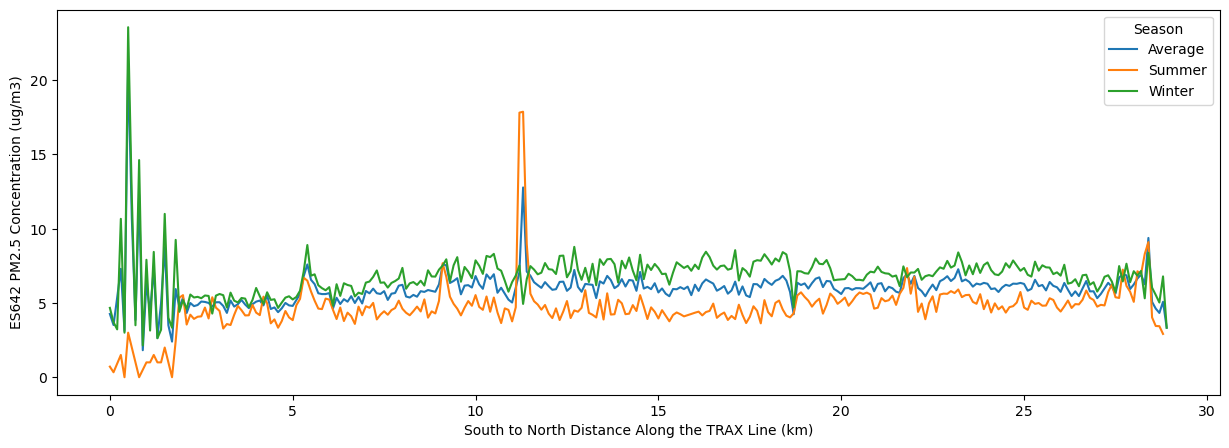

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(ax=ax, data=pm25_avg_ns_dist, x='Distance_Bin_First', y='ES642_PM2.5_Concentration_ug/m3', label='Average')
sns.lineplot(ax=ax, data=summer_pm25_avg_ns_dist, x='Distance_Bin_First', y='ES642_PM2.5_Concentration_ug/m3', label='Summer')
sns.lineplot(ax=ax, data=winter_pm25_avg_ns_dist, x='Distance_Bin_First', y='ES642_PM2.5_Concentration_ug/m3', label='Winter')
ax.set_xlabel('South to North Distance Along the TRAX Line (km)')
ax.set_ylabel('ES642 PM2.5 Concentration (ug/m3)')
ax.legend(title='Season')